Exploring the dataset and visualisations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [2]:
df_classes=pd.read_csv('/kaggle/input/elliptic/txs_classes.csv')
df_edgelist=pd.read_csv('/kaggle/input/elliptic/txs_edgelist.csv')
df_features=pd.read_csv('/kaggle/input/elliptic/txs_features.csv')
print(df_classes.shape, df_edgelist.shape, df_features.shape)

(203769, 2) (234355, 2) (203769, 184)


In [3]:
df_c= pd.DataFrame(df_classes)
print(df_c.columns)

Index(['txId', 'class'], dtype='object')


In [4]:
df_e=pd.DataFrame(df_edgelist)
print(df_e.columns)

Index(['txId1', 'txId2'], dtype='object')


In [5]:
df_f=pd.DataFrame(df_features)
print(df_f.columns)

Index(['txId', 'Time step', 'Local_feature_1', 'Local_feature_2',
       'Local_feature_3', 'Local_feature_4', 'Local_feature_5',
       'Local_feature_6', 'Local_feature_7', 'Local_feature_8',
       ...
       'in_BTC_min', 'in_BTC_max', 'in_BTC_mean', 'in_BTC_median',
       'in_BTC_total', 'out_BTC_min', 'out_BTC_max', 'out_BTC_mean',
       'out_BTC_median', 'out_BTC_total'],
      dtype='object', length=184)


In [6]:
# merging the datasets - not merging the edgelist because it is graph structured. 
col_names = {0: 'txId', 1: 'time_step'}
for i in range(2, 167):
    col_names[i] = f'feature_{i-2}' 
df_f.rename(columns=col_names, inplace=True)

df_merged = pd.merge(df_f, df_c, left_on='txId', right_on='txId', how='left')

df_merged.rename(columns={'class': 'tx_class'}, inplace=True)

print('Merged DataFrame shape:', df_merged.shape)
df_merged.head(5)

Merged DataFrame shape: (203769, 185)


,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,tx_class
0,3321,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160199,...,0.534072,0.534072,0.534072,0.534072,1.668990e-01,0.367074,0.266986,0.266986,0.533972,3
1,11108,1,-0.137586,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.127429,...,5.611878,5.611878,5.611878,5.611878,5.861940e-01,5.025584,2.805889,2.805889,5.611778,3
2,51816,1,-0.170103,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160699,...,0.456608,0.456608,0.456608,0.456608,2.279902e-01,0.228518,0.228254,0.228254,0.456508,3
3,68869,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,...,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800,2
4,89273,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,...,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680,2


In [7]:
# Convert class labels from strings to meaningful categories
# '1' is illicit (fraud), '2' is licit (legitimate)
df_merged['tx_class'] = df_merged['tx_class'].replace({'1': 'illicit', '2': 'licit'})

# Filter the DataFrame to include only labeled transactions
df_labeled = df_merged[df_merged['tx_class'] != 'unknown'].copy()

print('Shape of labeled data:', df_labeled.shape)
print('\nClass distribution:\n', df_labeled['tx_class'].value_counts())

Shape of labeled data: (203769, 185)

Class distribution:
 tx_class
3    157205
2     42019
1      4545
Name: count, dtype: int64


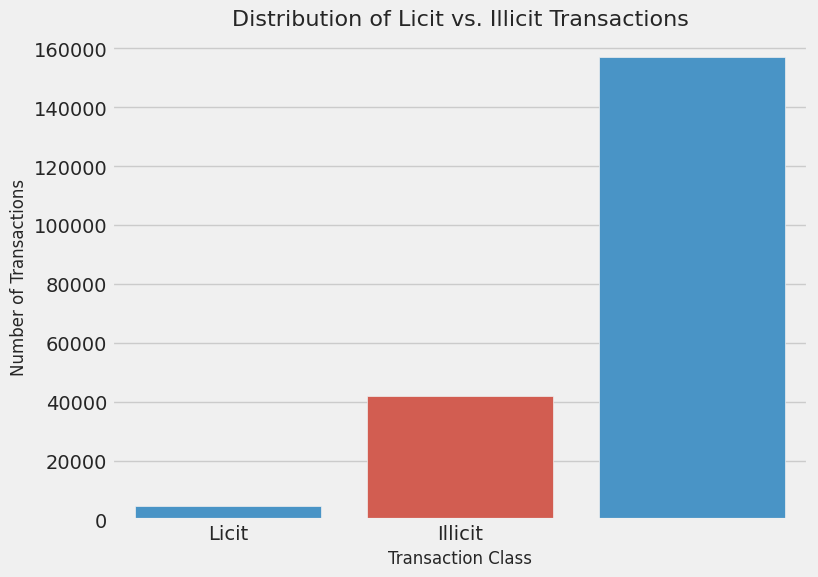

The percentage of illicit transactions is: 0.00%


In [8]:
# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='tx_class', data=df_labeled, palette=['#3498db', '#e74c3c'])
plt.title('Distribution of Licit vs. Illicit Transactions', fontsize=16)
plt.xlabel('Transaction Class', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks([0, 1], ['Licit', 'Illicit'])
plt.show()

# Calculate the percentage of illicit transactions
illicit_percentage = (df_labeled['tx_class'] == 'illicit').sum() / len(df_labeled) * 100
print(f'The percentage of illicit transactions is: {illicit_percentage:.2f}%')

Corrected Class Distribution:
tx_class
licit      42019
illicit     4545
Name: count, dtype: int64


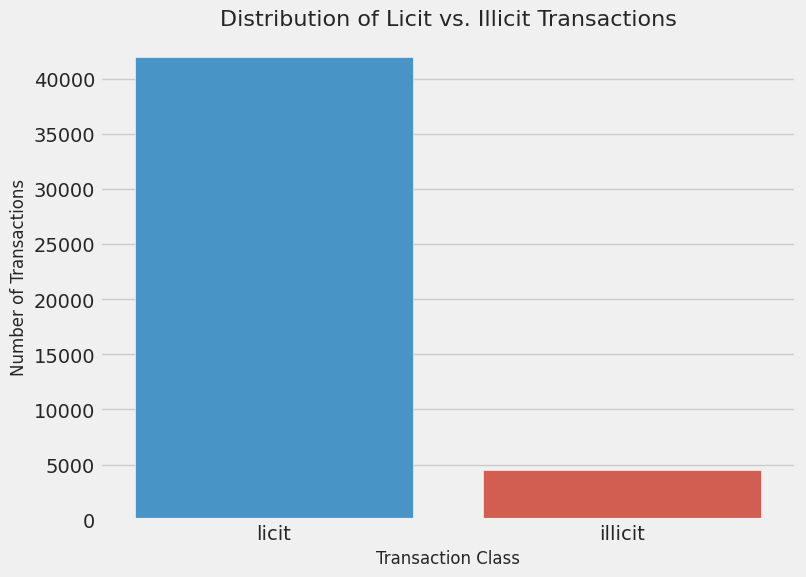

The percentage of illicit transactions is: 9.76%


In [9]:
df_merged['tx_class'] = df_merged['tx_class'].astype(str)

# Convert class labels '1' and '2' to meaningful names
df_merged['tx_class'] = df_merged['tx_class'].replace({'1': 'illicit', '2': 'licit'})

# Create a NEW DataFrame that ONLY contains labeled data
df_labeled = df_merged[df_merged['tx_class'].isin(['licit', 'illicit'])].copy()


print("Corrected Class Distribution:")
print(df_labeled['tx_class'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='tx_class', data=df_labeled, order=['licit', 'illicit'], palette=['#3498db', '#e74c3c'])
plt.title('Distribution of Licit vs. Illicit Transactions', fontsize=16)
plt.xlabel('Transaction Class', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.show()

illicit_percentage = (df_labeled['tx_class'] == 'illicit').sum() / len(df_labeled) * 100
print(f'The percentage of illicit transactions is: {illicit_percentage:.2f}%')

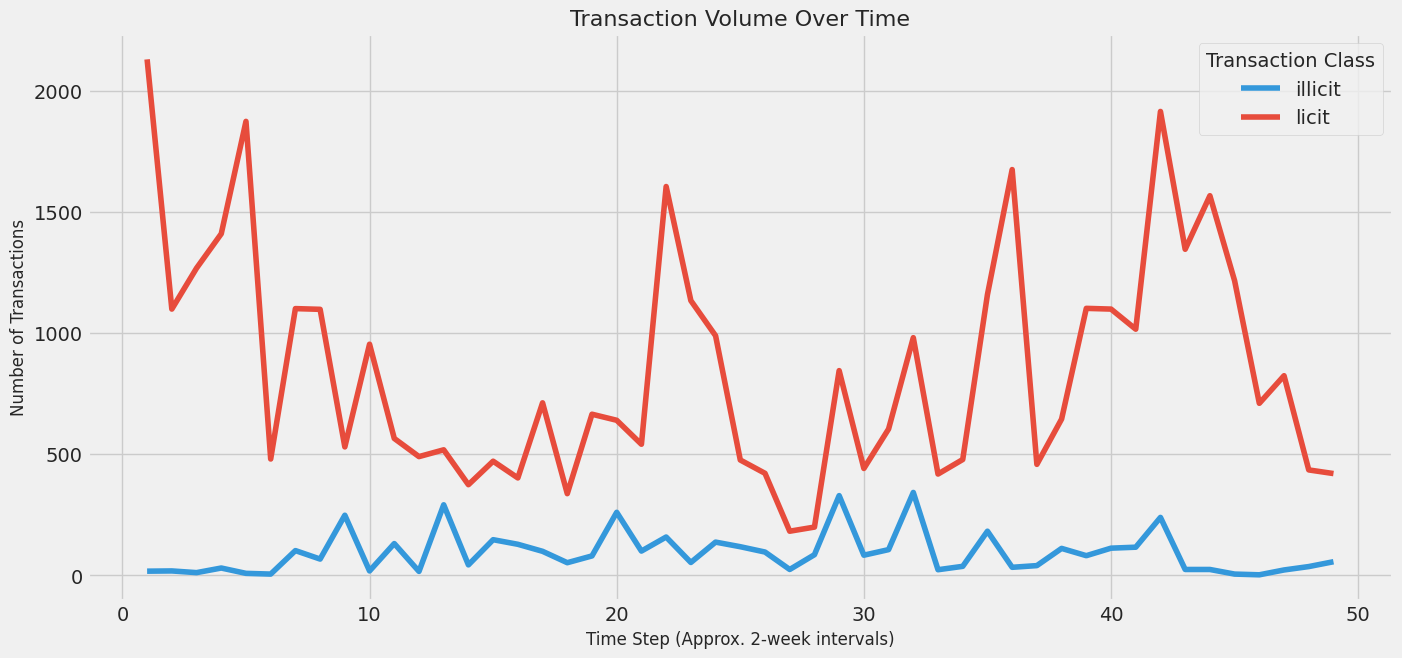

In [10]:
# Group data by time step and class to count transactions
temporal_counts = df_labeled.groupby(['Time step', 'tx_class']).size().unstack()

# Plot the temporal patterns
plt.figure(figsize=(15, 7))
temporal_counts.plot(kind='line', ax=plt.gca(), color=['#3498db', '#e74c3c'])
plt.title('Transaction Volume Over Time', fontsize=16)
plt.xlabel('Time Step (Approx. 2-week intervals)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.legend(title='Transaction Class')
plt.show()

Preprocessing and training 
The initial dataset contained over 200,000 transactions. However, a significant portion of these were unlabeled. For our supervised classification task, we correctly filtered the dataset to include only the 46,629 transactions that were explicitly labeled as 'licit' or 'illicit'.

SMOTE- Synthetic Minority Over-sampling Technique.This technique intelligently creates new, synthetic examples of our minority class (illicit transactions) to create a balanced dataset for training. 

In [14]:
!pip install --upgrade scikit-learn imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 61.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Define Features and Target
X = df_labeled.drop(columns=['txId', 'tx_class', 'Time step'])
y = df_labeled['tx_class'].apply(lambda x: 1 if x == 'illicit' else 0) # Encoding target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# preprocessing
# Impute Missing Values 
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)




1. Logistic Regression 

In [17]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, max_iter=1000)

print("Training...")

lr_model.fit(X_train_resampled, y_train_resampled)
print("Training completed.")

Training...
Training completed.


2. Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

nb_model = GaussianNB()

print("Training the Naive Bayes model...")
nb_model.fit(X_train_resampled, y_train_resampled)
print("Naive Bayes model trained successfully!")

Training the Naive Bayes model...
Naive Bayes model trained successfully!


3. Decision Tree Classifier- plotting a decision tree for this dataset is that a fully trained tree is massive and unreadable (it could be hundreds of levels).

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt_model = DecisionTreeClassifier(random_state=42)

print("Training the Decision Tree model...")
dt_model.fit(X_train_resampled, y_train_resampled)
print("Decision Tree model trained successfully!")


Training the Decision Tree model...
Decision Tree model trained successfully!


Did not plot the decision tree here because the dataset being too large will lead to 1000s of nodes which will make little sense when visualised.

Training the MLP model...
MLP model trained successfully!


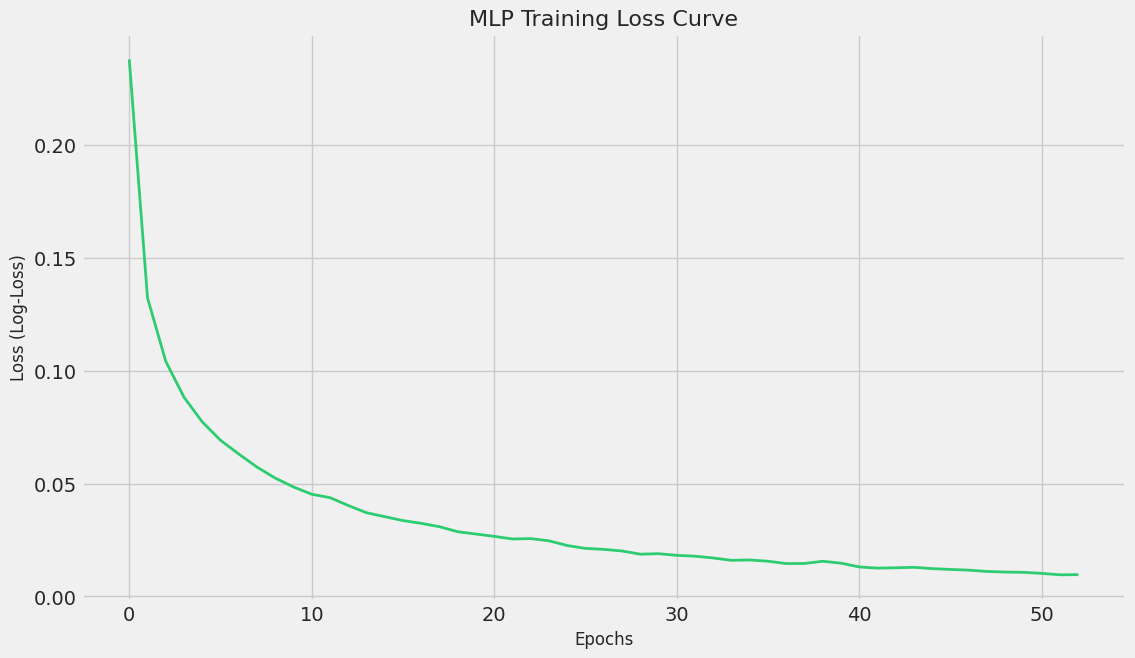


--- MLP Performance ---
              precision    recall  f1-score   support

       Licit       0.90      1.00      0.95      8404
     Illicit       0.00      0.00      0.00       909

    accuracy                           0.90      9313
   macro avg       0.45      0.50      0.47      9313
weighted avg       0.81      0.90      0.86      9313



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [20]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# 'early_stopping' prevents overfitting and makes training more efficient.
mlp_model = MLPClassifier(random_state=42, hidden_layer_sizes=(100,), max_iter=300, early_stopping=True, n_iter_no_change=10)


print("Training the MLP model...")
mlp_model.fit(X_train_resampled, y_train_resampled)
print("MLP model trained successfully!")

plt.figure(figsize=(12, 7))
plt.plot(mlp_model.loss_curve_, color='#2ecc71', linewidth=2)
plt.title('MLP Training Loss Curve', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss (Log-Loss)', fontsize=12)
plt.show()


y_pred_mlp = mlp_model.predict(X_test)
print("\n--- MLP Performance ---")
print(classification_report(y_test, y_pred_mlp, target_names=['Licit', 'Illicit']))

The accuracy metrics for illicit is 0.00 because the model is 'lazy', illicit transactions being <10% leads to model majorly using licit for training.

5. XGBoost - XGBoost uses decision trees as its base learners and combines them sequentially to improve the model’s performance. Each new tree is trained to correct the errors made by the previous tree and this process is called boosting.
It has built-in parallel processing to train models on large datasets quickly. XGBoost also supports customizations allowing users to adjust model parameters to optimize performance based on the specific problem.

In [23]:
from sklearn.model_selection import GridSearchCV

parameter_space = {
    'hidden_layer_sizes': [(50, 50), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.005],
}
# optimize for the 'f1' score, which is the best metric for
# imbalanced problem. 'cv=3' is 3-fold cross-validation.
mlp_grid = MLPClassifier(random_state=42, max_iter=300, early_stopping=True, n_iter_no_change=10)

clf = GridSearchCV(
    mlp_grid, 
    parameter_space, 
    n_jobs=-1,  # Uses all your CPU cores
    cv=3,         # 3-fold cross-validation
    scoring='f1'  
)

print("Running GridSearchCV... This may take several minutes.")
# fit on the RESAMPLED data to give the model a balanced dataset to learn from
clf.fit(X_train_resampled, y_train_resampled)

print("\nBest parameters found:\n", clf.best_params_)
best_mlp_model = clf.best_estimator_

y_pred_mlp_tuned = best_mlp_model.predict(X_test_scaled)

print("\n--- Tuned MLP Performance ---")
print(classification_report(y_test, y_pred_mlp_tuned, target_names=['Licit', 'Illicit']))

Running GridSearchCV... This may take several minutes.

Best parameters found:
 {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'solver': 'adam'}

--- Tuned MLP Performance ---
              precision    recall  f1-score   support

       Licit       0.99      0.99      0.99      8404
     Illicit       0.87      0.89      0.88       909

    accuracy                           0.98      9313
   macro avg       0.93      0.94      0.93      9313
weighted avg       0.98      0.98      0.98      9313



Training the XGBoost model...
XGBoost model trained successfully!


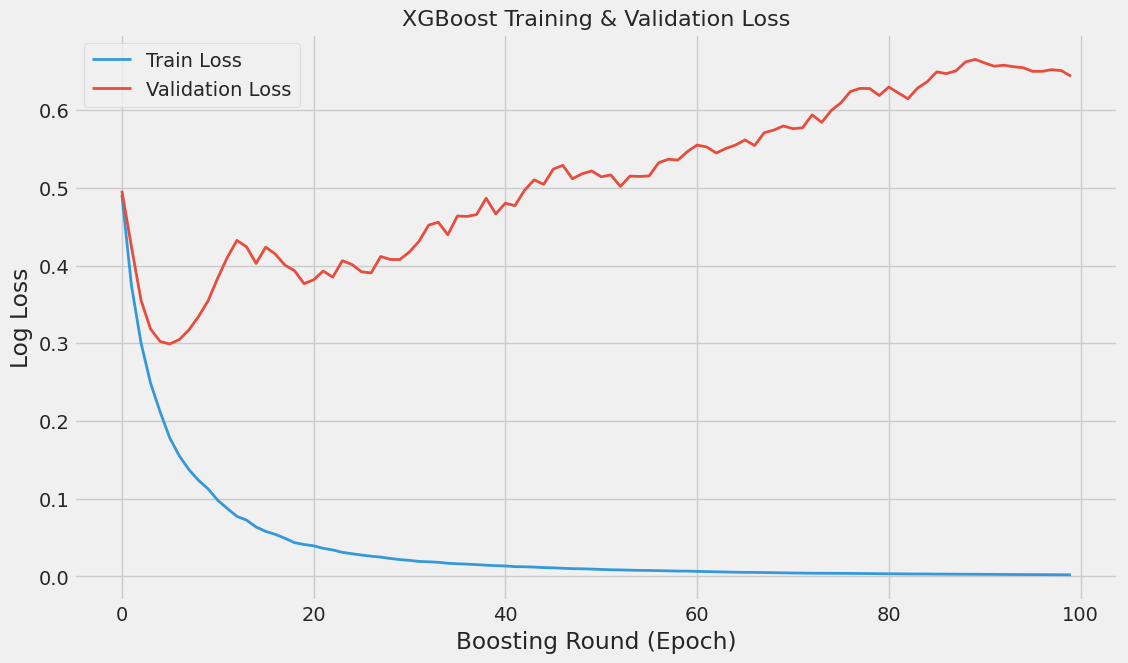


--- XGBoost Performance ---
              precision    recall  f1-score   support

       Licit       0.90      1.00      0.95      8404
     Illicit       0.00      0.00      0.00       909

    accuracy                           0.90      9313
   macro avg       0.45      0.50      0.47      9313
weighted avg       0.81      0.90      0.86      9313



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [21]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Set styling for the plot
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')


# 'eval_metric' tells XGBoost which loss function to track.
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# This allows us to watch the model's performance on unseen test data as it trains.
eval_set = [(X_train_resampled, y_train_resampled), (X_test, y_test)]


print("Training the XGBoost model...")
# 'verbose=False' keeps the output clean in the notebook.
xgb_model.fit(X_train_resampled, y_train_resampled, eval_set=eval_set, verbose=False)
print("XGBoost model trained successfully!")


# The loss history is stored in the model's evals_result().
results = xgb_model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train Loss', color='#3498db', linewidth=2)
ax.plot(x_axis, results['validation_1']['logloss'], label='Validation Loss', color='#e74c3c', linewidth=2)
ax.legend()
plt.ylabel('Log Loss')
plt.xlabel('Boosting Round (Epoch)')
plt.title('XGBoost Training & Validation Loss', fontsize=16)
plt.show()


y_pred_xgb = xgb_model.predict(X_test)
print("\n--- XGBoost Performance ---")
print(classification_report(y_test, y_pred_xgb, target_names=['Licit', 'Illicit']))

In [24]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import classification_report


# We use the original, imbalanced y_train for this calculation
# y_train (0 for Licit, 1 for Illicit)
counts = np.bincount(y_train)
licit_count = counts[0]
illicit_count = counts[1]
scale_pos_weight = licit_count / illicit_count

print(f"Licit Count: {licit_count}, Illicit Count: {illicit_count}")
print(f"Calculated scale_pos_weight: {scale_pos_weight:.2f}")


# We tell the model to pay ~9.25 times more attention to illicit samples
xgb_model_weighted = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight  
)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)]


print("\nTraining XGBoost with scale_pos_weight...")
# We train on the ORIGINAL (imbalanced) but scaled training data
xgb_model_weighted.fit(
    X_train_scaled,
    y_train,
    eval_set=eval_set,
    verbose=False
)
print("XGBoost (weighted) model trained successfully!")

y_pred_xgb_weighted = xgb_model_weighted.predict(X_test_scaled)
print("\n--- XGBoost Performance (with scale_pos_weight) ---")
print(classification_report(y_test, y_pred_xgb_weighted, target_names=['Licit', 'Illicit']))

Licit Count: 33615, Illicit Count: 3636
Calculated scale_pos_weight: 9.25

Training XGBoost with scale_pos_weight...
XGBoost (weighted) model trained successfully!

--- XGBoost Performance (with scale_pos_weight) ---
              precision    recall  f1-score   support

       Licit       0.99      1.00      1.00      8404
     Illicit       0.97      0.94      0.96       909

    accuracy                           0.99      9313
   macro avg       0.98      0.97      0.98      9313
weighted avg       0.99      0.99      0.99      9313



In [25]:
from sklearn.model_selection import GridSearchCV


parameter_space = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1]
}


# 'scoring="f1"' is the most important part. It forces the model
# to get a good F1-Score for the illicit class.
xgb_grid = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

clf = GridSearchCV(
    xgb_grid,
    parameter_space,
    n_jobs=-1,  # Uses all your CPU cores
    cv=3,         # 3-fold cross-validation
    scoring='f1'  
)


print("Running GridSearchCV for XGBoost... This will take several minutes.")
# We fit on the RESAMPLED (SMOTE) data
clf.fit(X_train_resampled, y_train_resampled)


print("\nBest parameters found:\n", clf.best_params_)
best_xgb_model = clf.best_estimator_

y_pred_xgb_tuned = best_xgb_model.predict(X_test_scaled)

print("\n--- Tuned XGBoost Performance ---")
print(classification_report(y_test, y_pred_xgb_tuned, target_names=['Licit', 'Illicit']))

Running GridSearchCV for XGBoost... This will take several minutes.

Best parameters found:
 {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

--- Tuned XGBoost Performance ---
              precision    recall  f1-score   support

       Licit       0.99      1.00      1.00      8404
     Illicit       0.98      0.92      0.95       909

    accuracy                           0.99      9313
   macro avg       0.99      0.96      0.97      9313
weighted avg       0.99      0.99      0.99      9313



In [26]:

print("Making predictions on the test set...")

# 1. Logistic Regression
y_pred_lr = lr_model.predict(X_test_scaled)

# 2. Naive Bayes

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
nb_model.fit(X_train_resampled, y_train_resampled) # Assuming X_train_resampled was based on imputed, non-scaled data
y_pred_nb = nb_model.predict(X_test_imputed) # Predict on imputed, non-scaled test data

# 3. Decision Tree
# We'll use the SMOTE-resampled data for consistency
dt_model.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt_model.predict(X_test_scaled)

# 4. MLP (Tuned)
# Assumes 'best_mlp_model' is your final tuned model
y_pred_mlp = best_mlp_model.predict(X_test_scaled)

# 5. XGBoost (Tuned or Weighted)
# Assumes 'best_xgb_model' or 'xgb_model_weighted' is your final model
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

print("All predictions are complete.")

Making predictions on the test set...
All predictions are complete.


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report


predictions = {
    'Logistic Regression': y_pred_lr,
    'Naive Bayes': y_pred_nb,
    'Decision Tree': y_pred_dt,
    'MLP (Tuned)': y_pred_mlp,
    'XGBoost (Tuned)': y_pred_xgb
}


for name, pred in predictions.items():
    print(f"\n--- Classification Report for {name} ---")
    print(classification_report(y_test, pred, target_names=['Licit', 'Illicit']))


results = {
    'Model': [],
    'Accuracy': [],
    'Precision (Illicit)': [],
    'Recall (Illicit)': [],
    'F1-Score (Illicit)': []
}

for name, pred in predictions.items():
    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, pred))
    # We specify pos_label=1 to calculate metrics for the 'illicit' class
    results['Precision (Illicit)'].append(precision_score(y_test, pred, pos_label=1))
    results['Recall (Illicit)'].append(recall_score(y_test, pred, pos_label=1))
    results['F1-Score (Illicit)'].append(f1_score(y_test, pred, pos_label=1))


results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)


results_df = results_df.sort_values(by='F1-Score (Illicit)', ascending=False)

print("\n\n--- Final Model Comparison Summary ---")
display(results_df)


--- Classification Report for Logistic Regression ---
              precision    recall  f1-score   support

       Licit       0.99      0.90      0.94      8404
     Illicit       0.49      0.93      0.64       909

    accuracy                           0.90      9313
   macro avg       0.74      0.91      0.79      9313
weighted avg       0.94      0.90      0.91      9313


--- Classification Report for Naive Bayes ---
              precision    recall  f1-score   support

       Licit       0.90      1.00      0.95      8404
     Illicit       0.00      0.00      0.00       909

    accuracy                           0.90      9313
   macro avg       0.45      0.50      0.47      9313
weighted avg       0.81      0.90      0.86      9313


--- Classification Report for Decision Tree ---
              precision    recall  f1-score   support

       Licit       0.99      0.98      0.98      8404
     Illicit       0.81      0.90      0.86       909

    accuracy                   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packag

,Accuracy,Precision (Illicit),Recall (Illicit),F1-Score (Illicit)
Model,,,,
XGBoost (Tuned),0.990980,0.983587,0.922992,0.952327
MLP (Tuned),0.975948,0.866310,0.891089,0.878525
Decision Tree,0.970364,0.813056,0.904290,0.856250
Logistic Regression,0.898529,0.489523,0.925193,0.640274
Naive Bayes,0.902395,0.000000,0.000000,0.000000


why the naive bayes fails:
1. it expects the dataset to be uniformly distributed but in our case the some transactions are small while some are large ie dataset is not uniformaly distributed.
2. the licit transactions being 90% lead to the model making false predictions.